In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#sns.set(rc={'figure.figsize':(11.7,8.27)})

Features
timestamp - timestamp field for grouping the data
cnt - the count of a new bike shares
t1 - real temperature in C
t2 - temperature in C “feels like”
hum - humidity in percentage
wind_speed - wind speed in km/h
weather_code - category of the weather
is_holiday - boolean field - 1 holiday / 0 non holiday
is_weekend - boolean field - 1 if the day is weekend
season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ClassPredictionError
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import warnings
warnings.filterwarnings("ignore")

/Users/ademarslan/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [4]:
#!pip install gdown
#!pip install tensorflow-gpu

In [5]:
from matplotlib import style
#style.use ('dark_background')

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # sayilar e den kurtariyoruz.



In [7]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#sns.set(rc={'figure.figsize':(11.7,8.27)})

In [8]:
df = pd.read_csv('store_sharing.csv',
                   parse_dates=['timestamp'], index_col='timestamp')
df.sample(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-12-05 03:00:00,169,12.000,12.000,69.500,35.000,1.000,0.000,1.000,3.000
2015-10-12 19:00:00,1823,12.000,12.000,65.000,6.500,2.000,0.000,0.000,2.000
2015-02-22 07:00:00,106,1.500,-1.500,84.000,9.000,1.000,0.000,1.000,3.000
2015-06-27 07:00:00,357,16.000,16.000,72.000,20.000,1.000,0.000,1.000,1.000
2015-10-05 15:00:00,729,18.000,18.000,88.000,12.000,7.000,0.000,0.000,2.000
2015-03-17 17:00:00,2942,11.500,11.500,74.500,12.000,3.000,0.000,0.000,0.000
2015-07-03 09:00:00,2515,20.000,20.000,53.000,15.000,1.000,0.000,0.000,1.000
2016-11-26 20:00:00,667,6.500,4.000,90.000,12.000,2.000,0.000,1.000,2.000
2016-03-13 18:00:00,977,5.000,2.000,81.000,17.000,1.000,0.000,1.000,0.000


### EDA

In [9]:
df.shape

(17414, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [11]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [12]:
df.describe().T ## transpose()

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


#### There is a a high correlation between t1 and t2, we can remove one.

In [13]:
df["wind_speed"].value_counts()

12.000    842
11.000    832
14.000    832
15.000    828
13.000    828
         ... 
30.750      1
56.500      1
2.667       1
56.000      1
35.500      1
Name: wind_speed, Length: 103, dtype: int64

In [14]:
df.query("wind_speed==0")  #df.query('salary=="high"')#SQL query

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-18 04:00:00,73,4.000,4.000,87.000,0.000,7.000,0.000,1.000,3.000
2015-04-05 07:00:00,121,7.000,7.000,87.000,0.000,3.000,0.000,1.000,0.000
2015-04-08 09:00:00,1849,11.000,11.000,77.000,0.000,2.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...
2016-11-26 09:00:00,867,5.000,5.000,87.000,0.000,2.000,0.000,1.000,2.000
2016-11-27 00:00:00,384,5.000,5.000,93.000,0.000,2.000,0.000,1.000,2.000
2016-12-05 22:00:00,488,4.000,4.000,93.000,0.000,1.000,0.000,0.000,3.000


In [15]:
#df[df["wind_speed"]==0]

In [16]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000,0.389,0.369,-0.463,0.116,-0.167,-0.052,-0.096,-0.116
t1,0.389,1.000,0.988,-0.448,0.145,-0.097,-0.042,-0.005,-0.286
t2,0.369,0.988,1.000,-0.403,0.088,-0.098,-0.040,-0.009,-0.286
hum,-0.463,-0.448,-0.403,1.000,-0.288,0.335,0.032,0.028,0.290
wind_speed,0.116,0.145,0.088,-0.288,1.000,0.125,-0.003,0.011,0.010
weather_code,-0.167,-0.097,-0.098,0.335,0.125,1.000,0.013,0.042,0.099
is_holiday,-0.052,-0.042,-0.040,0.032,-0.003,0.013,1.000,-0.095,-0.032
is_weekend,-0.096,-0.005,-0.009,0.028,0.011,0.042,-0.095,1.000,0.001
season,-0.116,-0.286,-0.286,0.290,0.010,0.099,-0.032,0.001,1.000


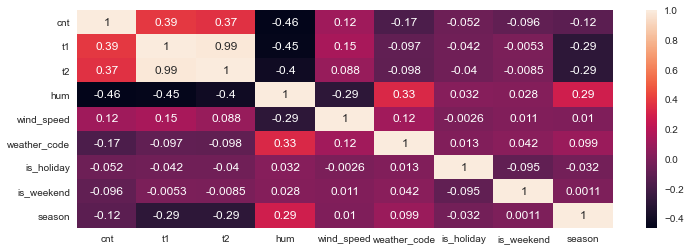

In [17]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True);

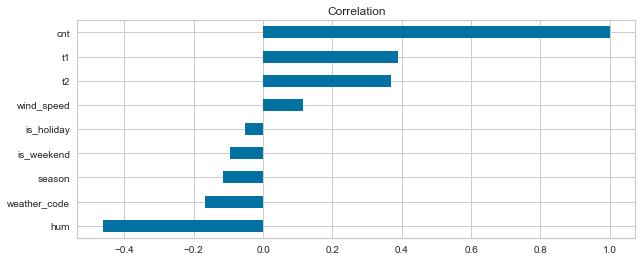

In [20]:
plt.figure(figsize = (10,4))
plt.title('Correlation')

df.corr()['cnt'].sort_values().plot.barh();

In [ ]:
df.shape

### Data Visualization

In [22]:
df1 =df.copy()

In [23]:
df1['hour'] = df.index.hour
df1['day_of_week'] = df.index.dayofweek
df1['day_of_month'] = df.index.day
df1['month'] = df.index.month
df1["year"] = df.index.year

In [24]:
df1["day_of_week"] = df1["day_of_week"].replace({0:'Sunday',1:'Monday', 2:'Tuesday',3:'Wednesday',4:"Thursday",5:"Friday", 6:"Saturday"})

df1["season"] = df1["season"].replace({0:'spring',1:'summer', 2:'fall',3:'winter'})

df1["month"] = df1["month"].replace({1:'January',2:'February', 3:'March',4:'April',5:"May",6:"June", 7:"July", 8:'August',9:'September',10:"October",11:"November", 12:"December"})


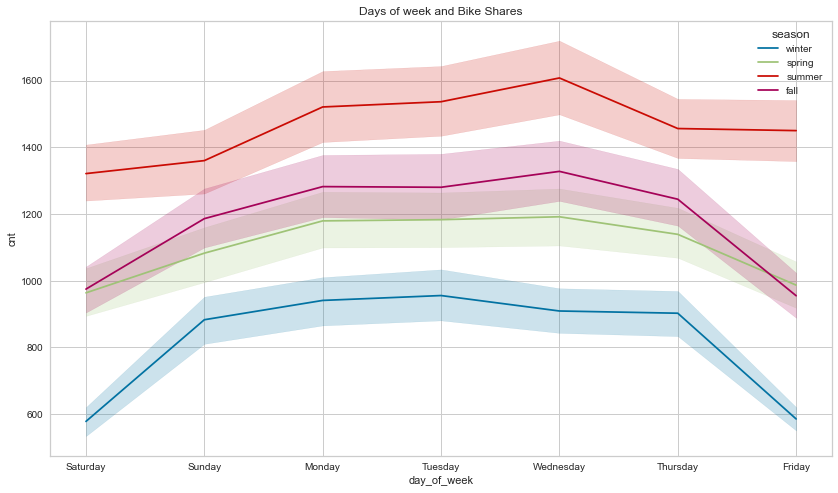

In [25]:
plt.figure(figsize=(14, 8))

plt.title('Days of week and Bike Shares')
sns.lineplot(x='day_of_week', y='cnt',hue='season',data=df1);

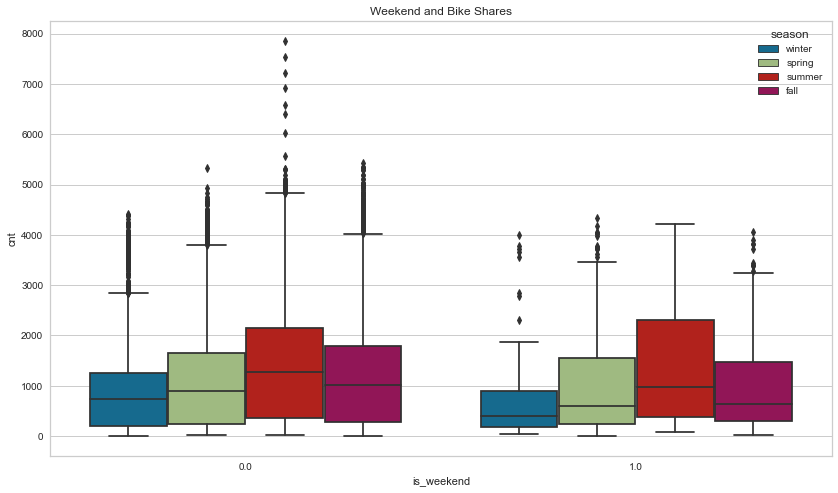

In [26]:
plt.figure(figsize=(14, 8))
plt.title('Weekend and Bike Shares')

sns.boxplot(x='is_weekend', y='cnt',hue='season',data=df1);

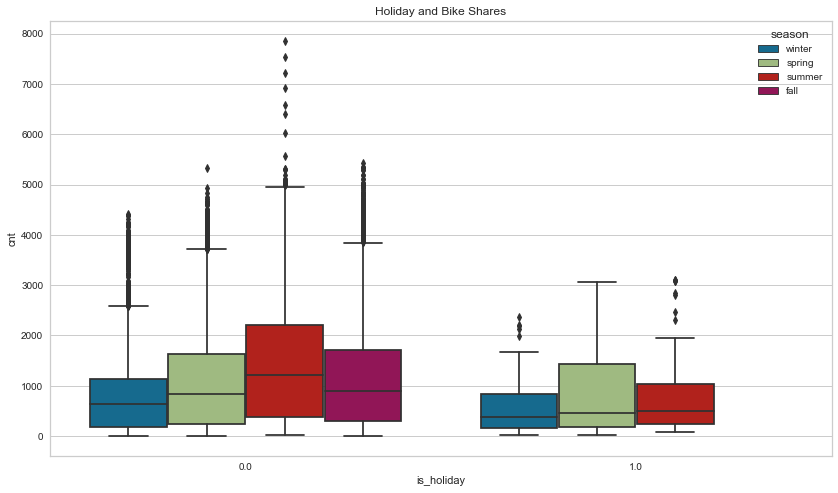

In [27]:
plt.figure(figsize=(14, 8))
plt.title('Holiday and Bike Shares')

sns.boxplot(x='is_holiday', y='cnt',hue='season',data=df1);

<AxesSubplot:title={'center':'Real Temperature and Bike Shares'}, xlabel='t1', ylabel='cnt'>

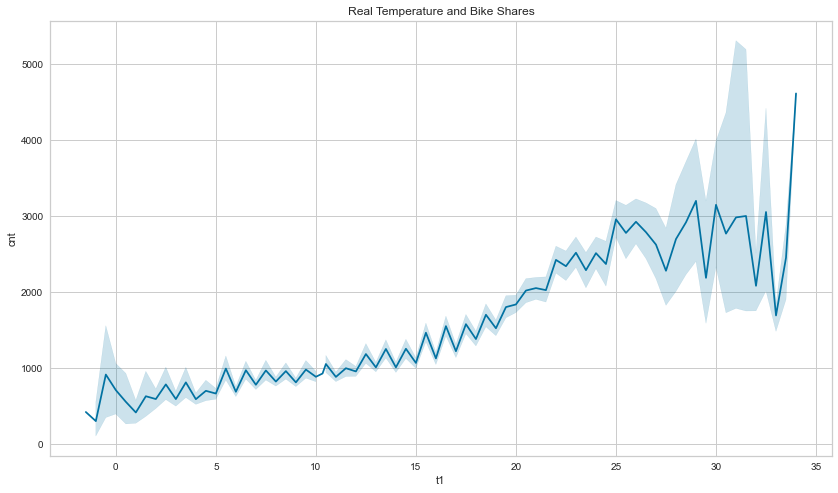

In [28]:
plt.figure(figsize=(14, 8))
plt.title('Real Temperature and Bike Shares')

sns.lineplot(x='t1',y = "cnt", data=df1)

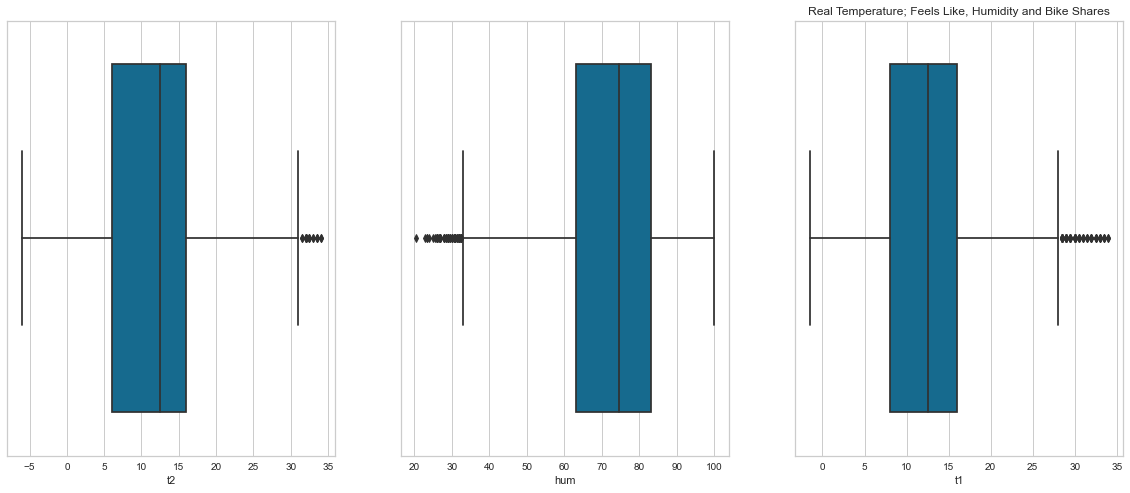

In [29]:
fig, axs = plt.subplots(ncols=3,figsize=(20, 8) )
plt.title('Real Temperature; Feels Like, Humidity and Bike Shares')

sns.boxplot(x='t2', data=df1,ax=axs[0])

sns.boxplot(x='hum', data=df1, ax=axs[1])
sns.boxplot(x='t1', data=df1, ax=axs[2]);



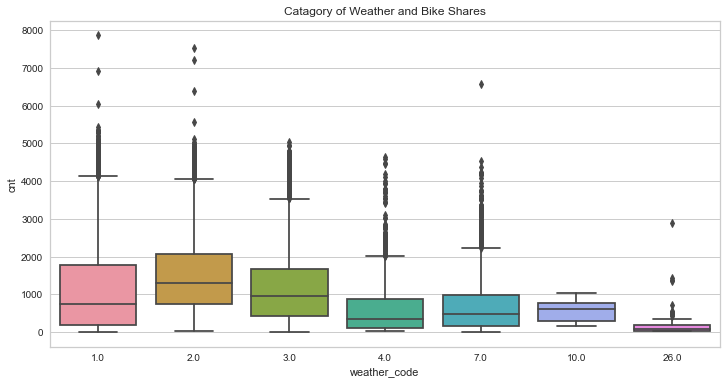

In [30]:
plt.figure(figsize=(12, 6))
plt.title('Catagory of Weather and Bike Shares')

sns.boxplot(x='weather_code',y = "cnt", data=df1);

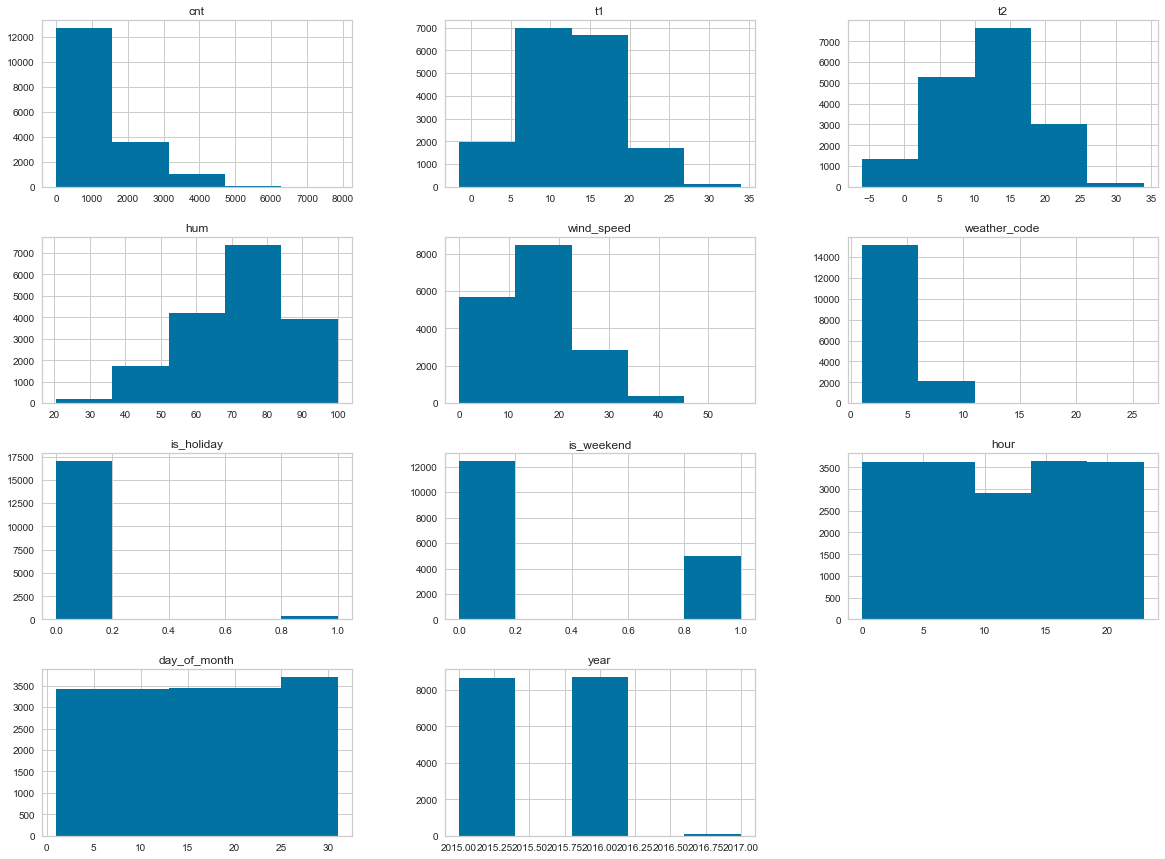

In [31]:
 #Draws histograms for all features
%matplotlib inline
import matplotlib.pyplot as plt
df1.hist(bins=5, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [32]:
numeric= ["t1","t2","hum", "cnt", "wind_speed"]

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [34]:
from scipy.stats import zscore

In [35]:
#1
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(),
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit,
                                                                   (np.round(percentile_threshold, 3),
                                                                    np.round(100-percentile_threshold, 3))),
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [36]:
#2
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()


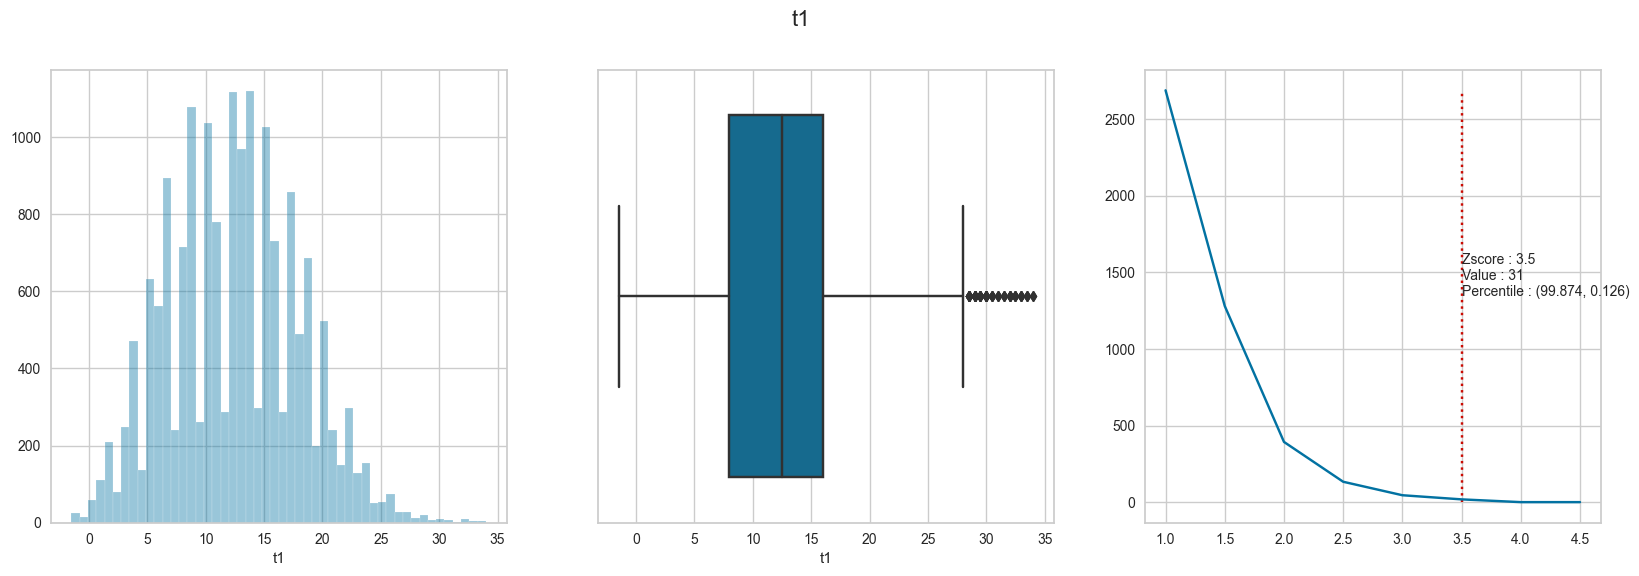

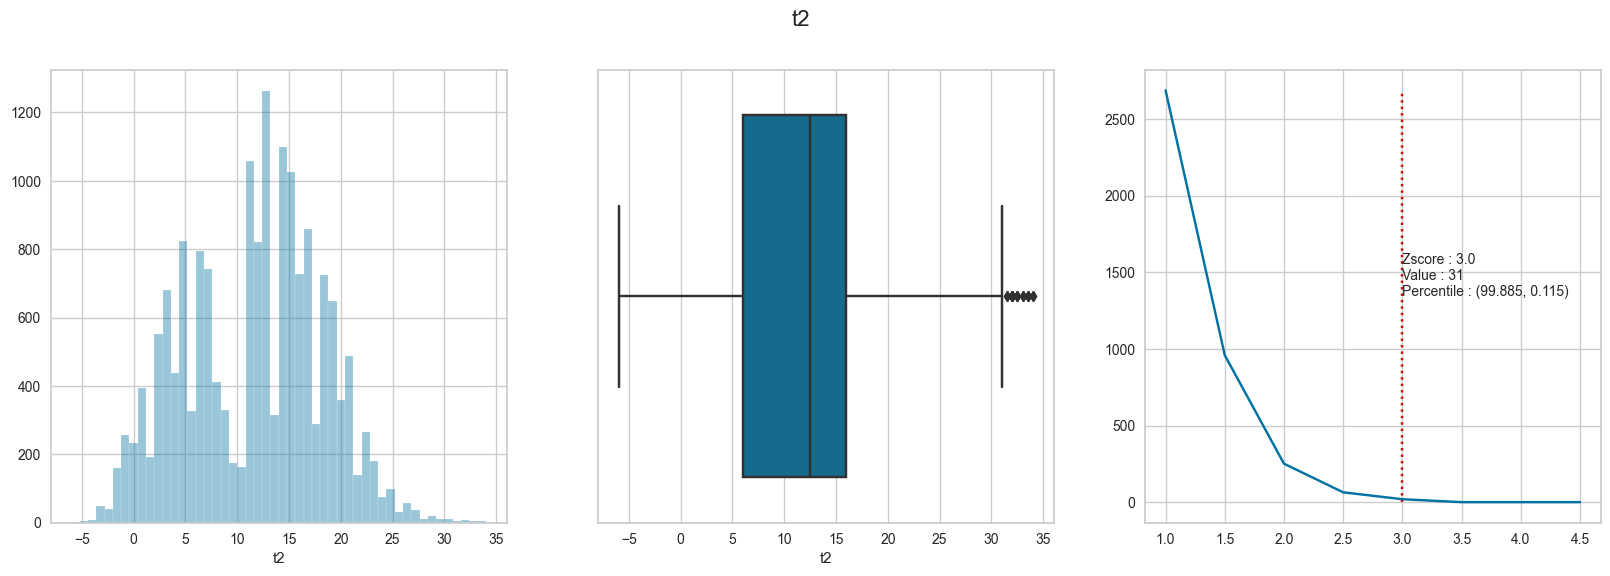

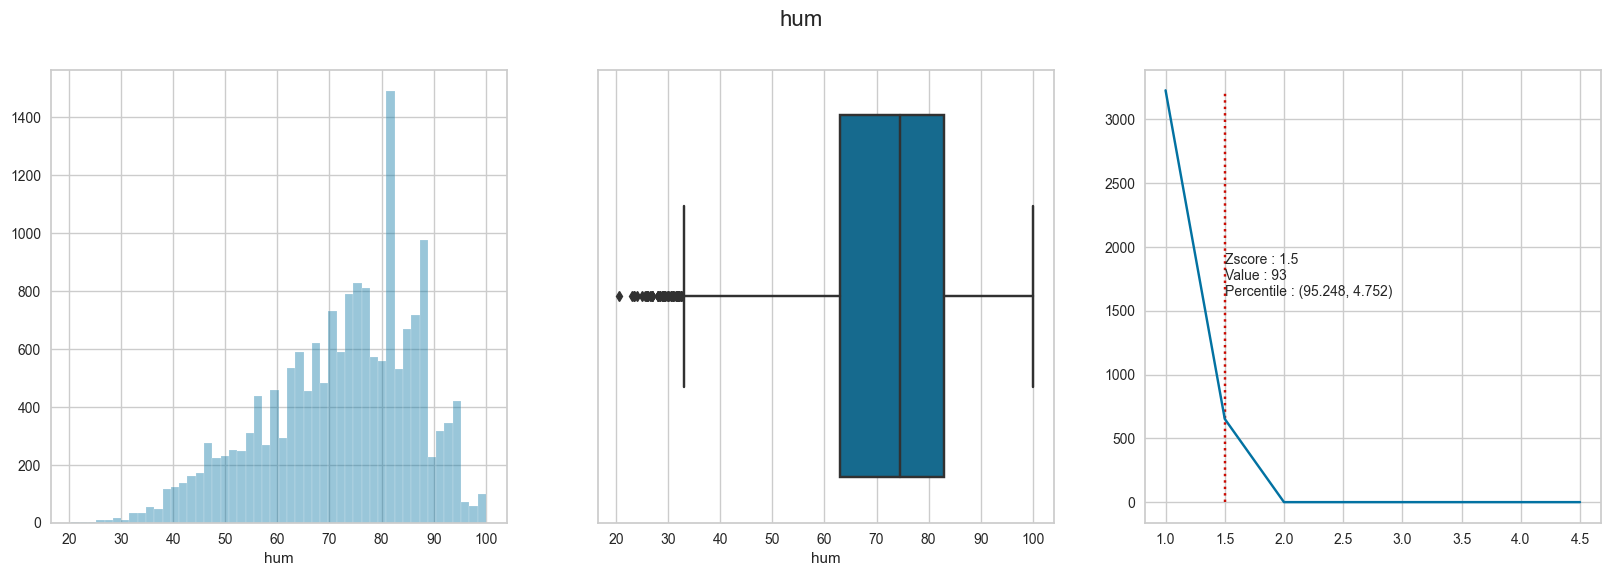

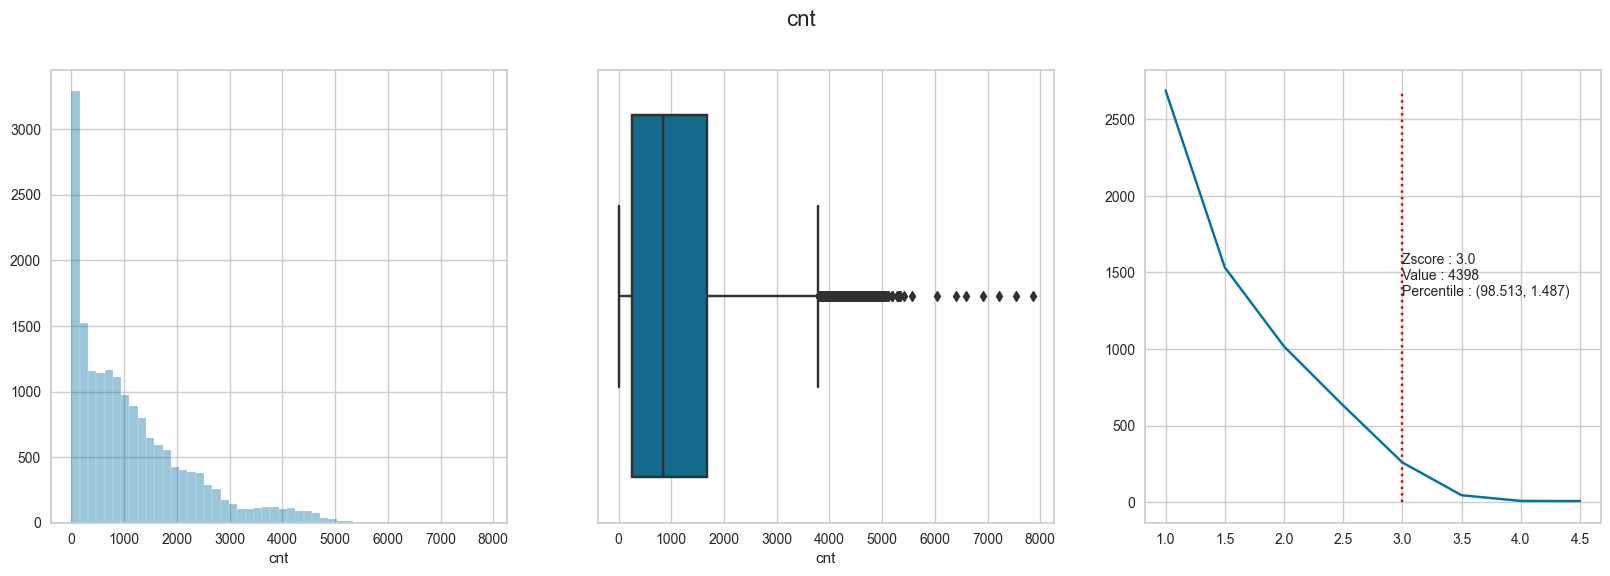

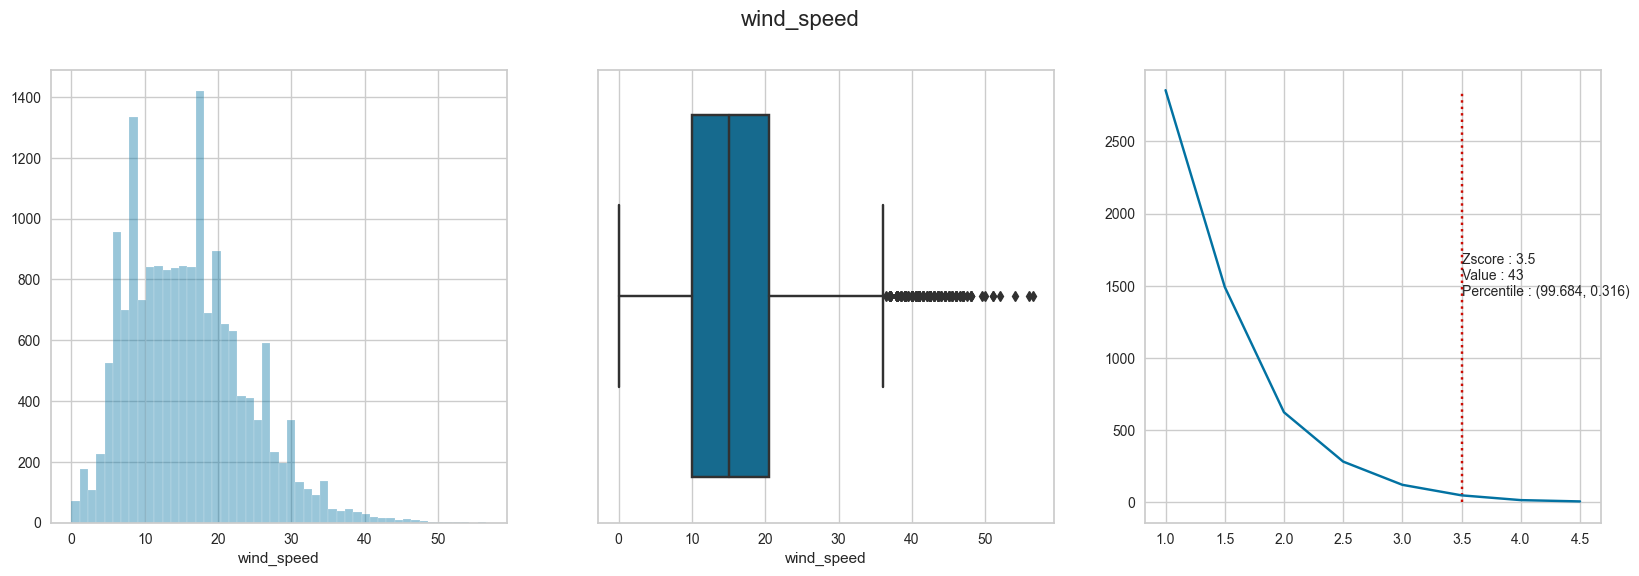

In [37]:

for i in numeric:
    outlier_inspect(df, i)

In [38]:
def detect_outliers(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

for col in df.columns:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 7 outliers in cnt
There are 3 outliers in wind_speed
There are 74 outliers in weather_code
There are 384 outliers in is_holiday


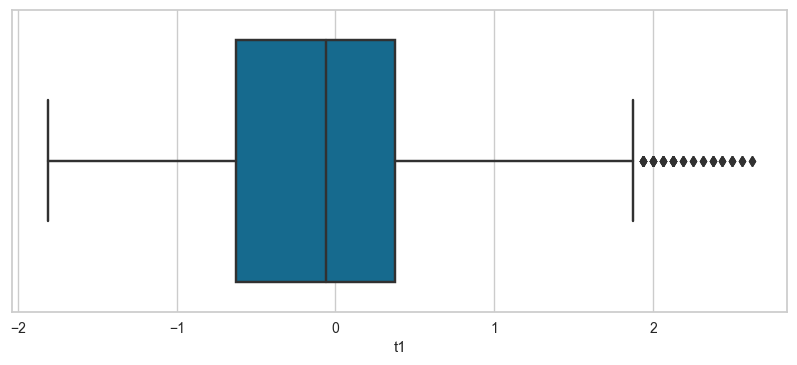

In [45]:
fig = plt.figure(figsize=(10, 4))
sns.boxplot(df["t1"],   whis=1.5);

In [46]:
df[df["t1"]>32]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,


In [61]:
#Baskilama ile outlier i iceri aldik.
def outliers_detection(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_bound = df[variable].quantile(0.25) - (IQR * 2)
    upper_bound = df[variable].quantile(0.75) + (IQR * 2)
    df[variable] = np.where(df[variable] > upper_bound, upper_bound, df[variable])
    df[variable] = np.where(df[variable] < lower_bound, lower_bound, df[variable])
    return df[variable]
for i in numeric:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound = df[i].quantile(0.25) - (IQR * 2)
    upper_bound = df[i].quantile(0.75) + (IQR * 2)
    if (df[i].max() > upper_bound) | (df[i].min() < lower_bound):
        outliers_detection(df, i)

### Z_Score

In [381]:
#num_features = df1.select_dtypes(exclude='object')


In [382]:
for i in numeric:
    df.loc[df[i] < detect_outliers(df, i)[0]][i] = detect_outliers(df, i)[0]
    df.loc[df[i] > detect_outliers(df, i)[1]][i] = detect_outliers(df, i)[1]

In [62]:
def outliers_detection(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_bound = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[variable].quantile(0.75) + (IQR * 1.5)
    df[variable] = np.where(df[variable] > upper_bound, upper_bound, df[variable])
    df[variable] = np.where(df[variable] < lower_bound, lower_bound, df[variable])
    return df[variable]


In [384]:
for i in numeric:
    df1.loc[df[i] < outliers_detection(df1, i)[0]][i] = outliers_detection(df1, i)[0]
    df1.loc[df[i] > outliers_detection(df1, i)[1]][i] = outliers_detection(df1, i)[1]

In [386]:
for col in df.columns:
    if outliers_detection(df1, col)[2] > 0:
        print("There are {} outliers in {}".format(outliers_detection(df, col)[2], col))

There are 134.0 outliers in cnt
There are 96.5 outliers in hum
There are 1.0 outliers in weather_code
There are 1.0 outliers in is_weekend


TypeError: can't multiply sequence by non-int of type 'float'

In [454]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000


Let’s have a look at the bike shares over time:

<AxesSubplot:title={'center':'Bike Shares in 2016-2017'}, xlabel='timestamp', ylabel='cnt'>

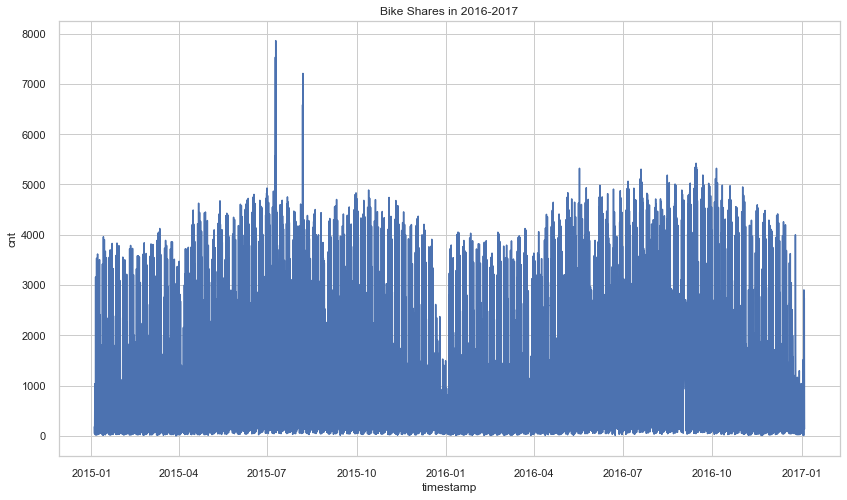

In [455]:
plt.figure(figsize=(14, 8))
plt.title('Bike Shares in 2016-2017')

sns.lineplot(x=df.index, y='cnt',data=df)

Let’s have a look at the same data on a monthly basis:

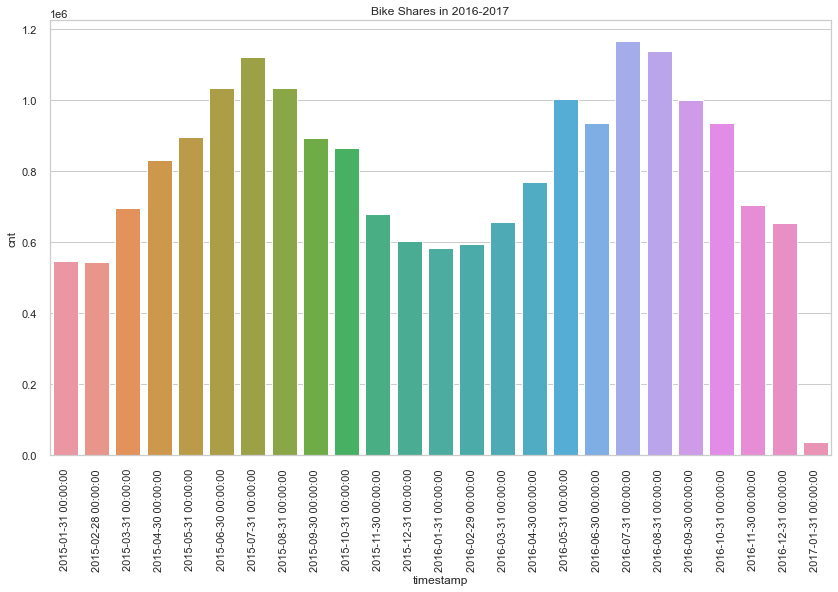

In [460]:
df1_by_month = df.resample('M').sum()

plt.figure(figsize=(14, 8))
plt.title('Bike Shares in 2016-2017')
sns.barplot(x=df1_by_month.index, y='cnt',data=df1_by_month)
plt.xticks(rotation = 90);

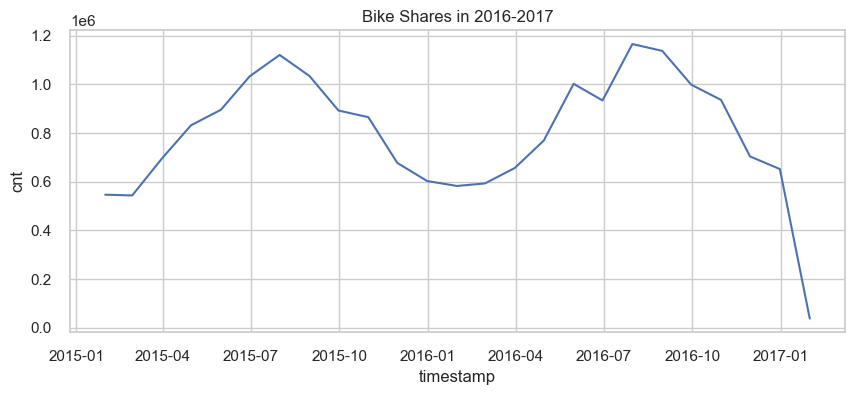

In [143]:
df_by_month = df1.resample('M').sum()

plt.figure(figsize=(10, 4))
plt.title('Bike Shares in 2016-2017')
sns.lineplot(x=df_by_month.index, y='cnt',data=df_by_month);

<Figure size 2000x1500 with 0 Axes>

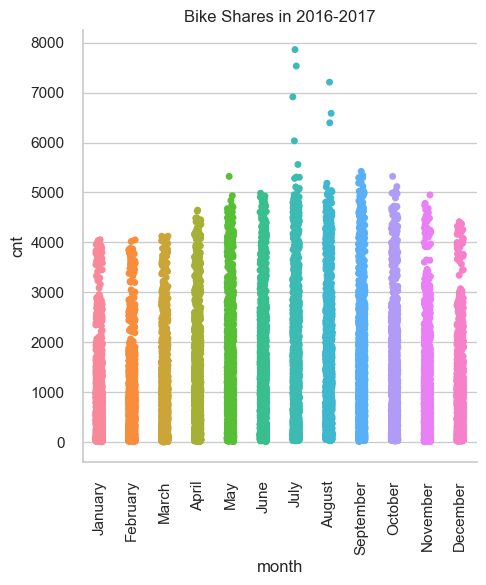

In [151]:
plt.figure(figsize=(20, 15))
sns.catplot(x="month", y="cnt", data=df1)

plt.title('Bike Shares in 2016-2017')
plt.xticks(rotation = 90);

Our data seems to have a strong seasonality component. Summer months are good for business.

Let's have look at the bike shares by the hour:

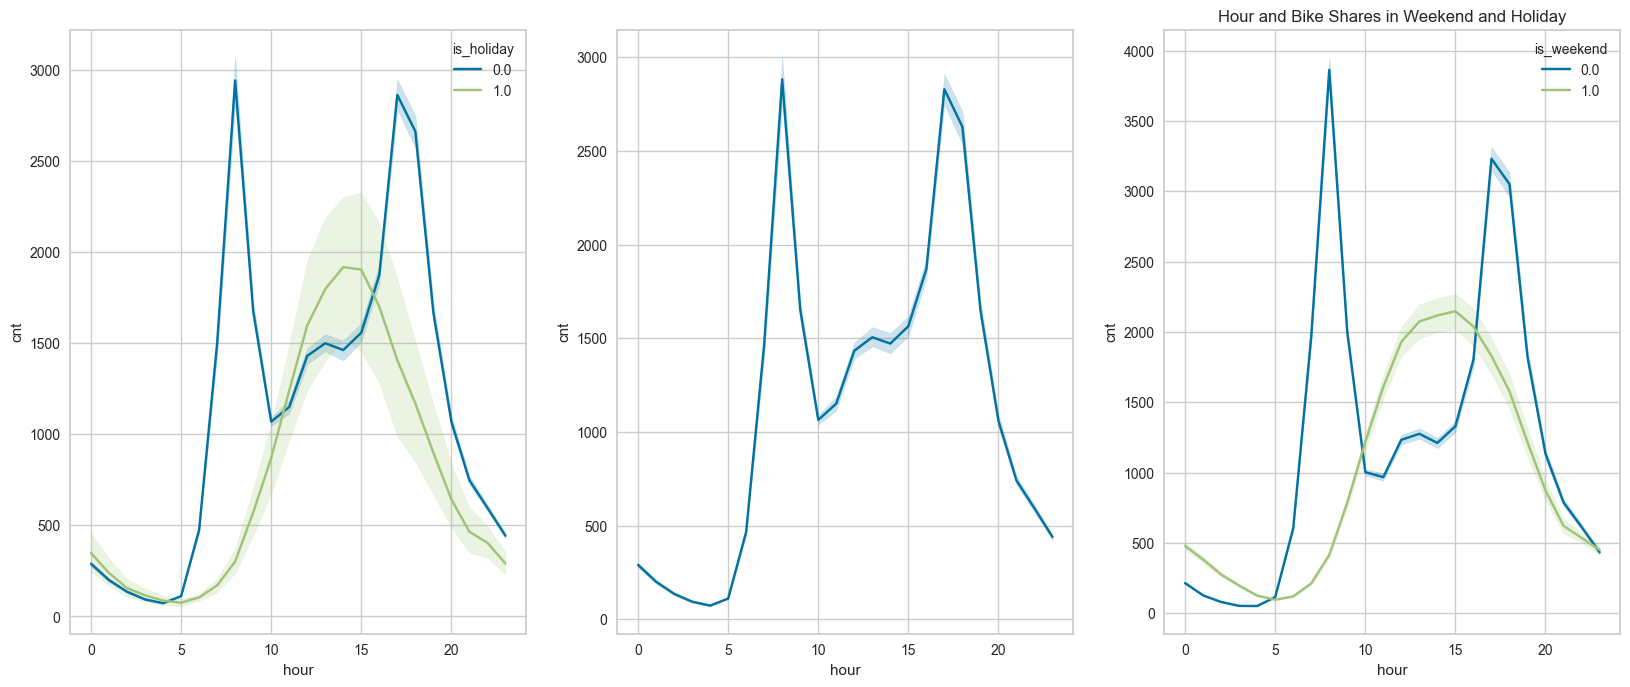

In [51]:
fig, axs = plt.subplots(ncols=3,figsize=(20, 8) )
plt.title('Hour and Bike Shares in Weekend and Holiday')

sns.lineplot(x='hour', y='cnt',hue='is_holiday',data=df1,ax=axs[0])
sns.lineplot(data=df1, x='hour', y='cnt', ax=axs[1])
sns.lineplot(x='hour', y='cnt',hue='is_weekend',data=df1,ax=axs[2]);

The hours with most bike shares differ significantly based on a weekend or not days. Workdays contain two large spikes during the morning and late afternoon hours (people pretend to work in between). On weekends early to late afternoon hours seem to be the busiest.

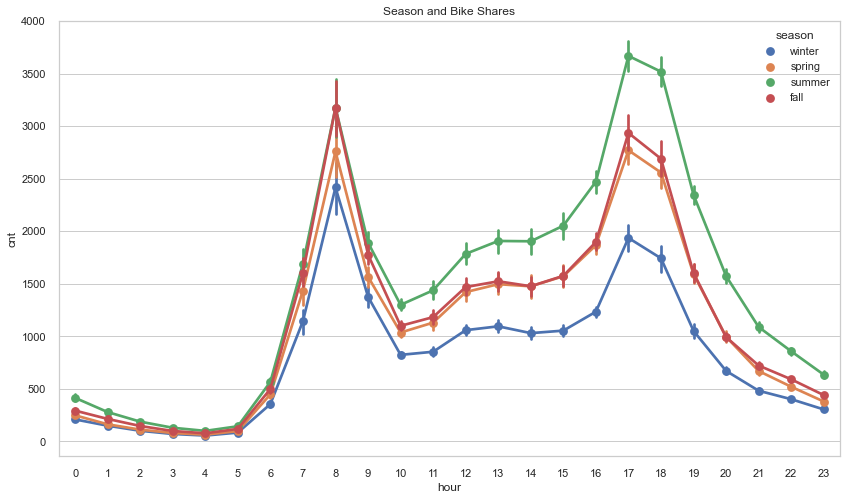

In [478]:
plt.figure(figsize=(14, 8))
plt.title('Season and Bike Shares')

df1["season"] = df1["season"].replace({0:'spring',1:'summer', 2:'fall',3:'winter'})
sns.pointplot(x='hour', y='cnt',hue="season",data=df1);

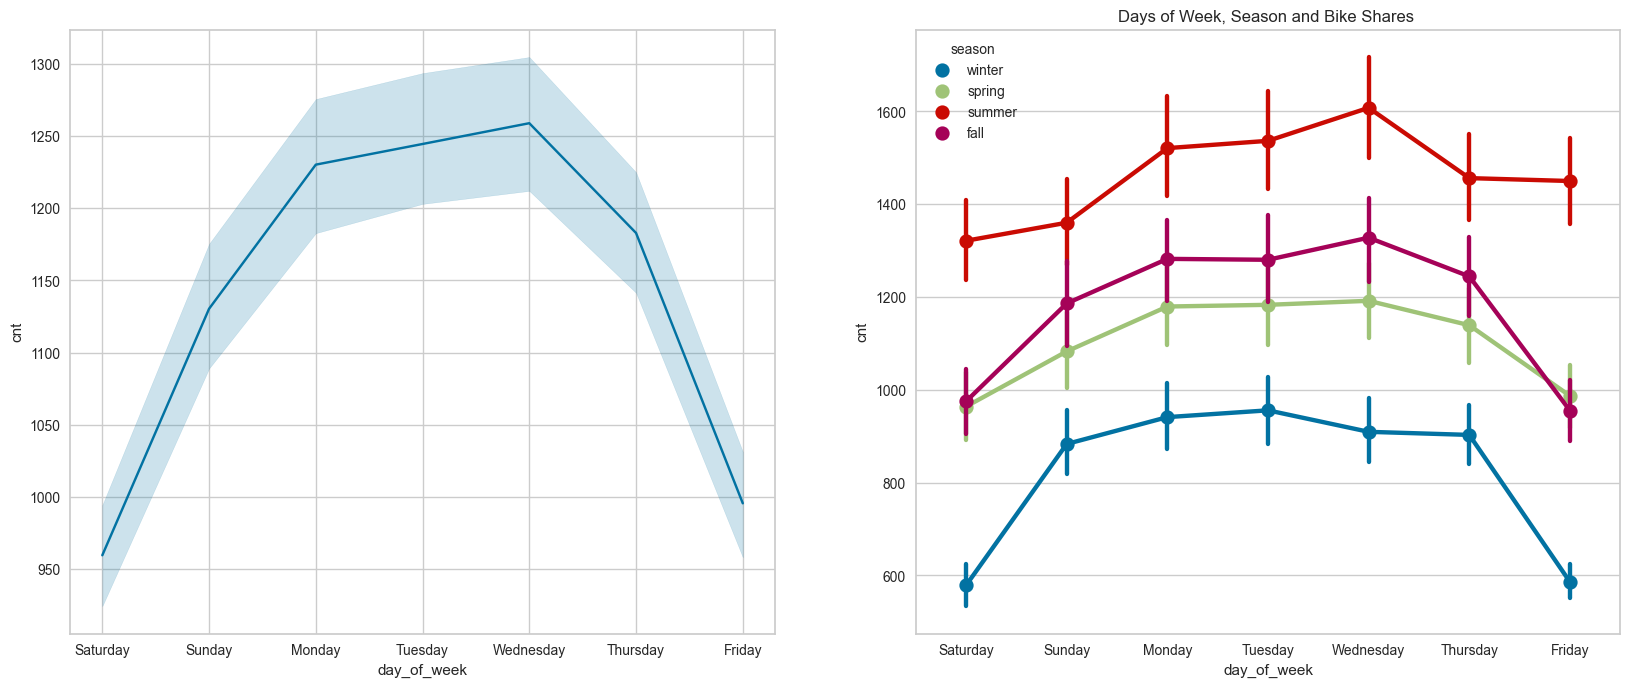

In [53]:
fig, axs = plt.subplots(ncols=2,figsize=(20, 8) )
plt.title('Days of Week, Season and Bike Shares ')

sns.lineplot(x='day_of_week', y='cnt',data=df1,ax=axs[0])
sns.pointplot(x='day_of_week', y='cnt',hue='season',data=df1, ax=axs[1]);



<Figure size 1200x600 with 0 Axes>

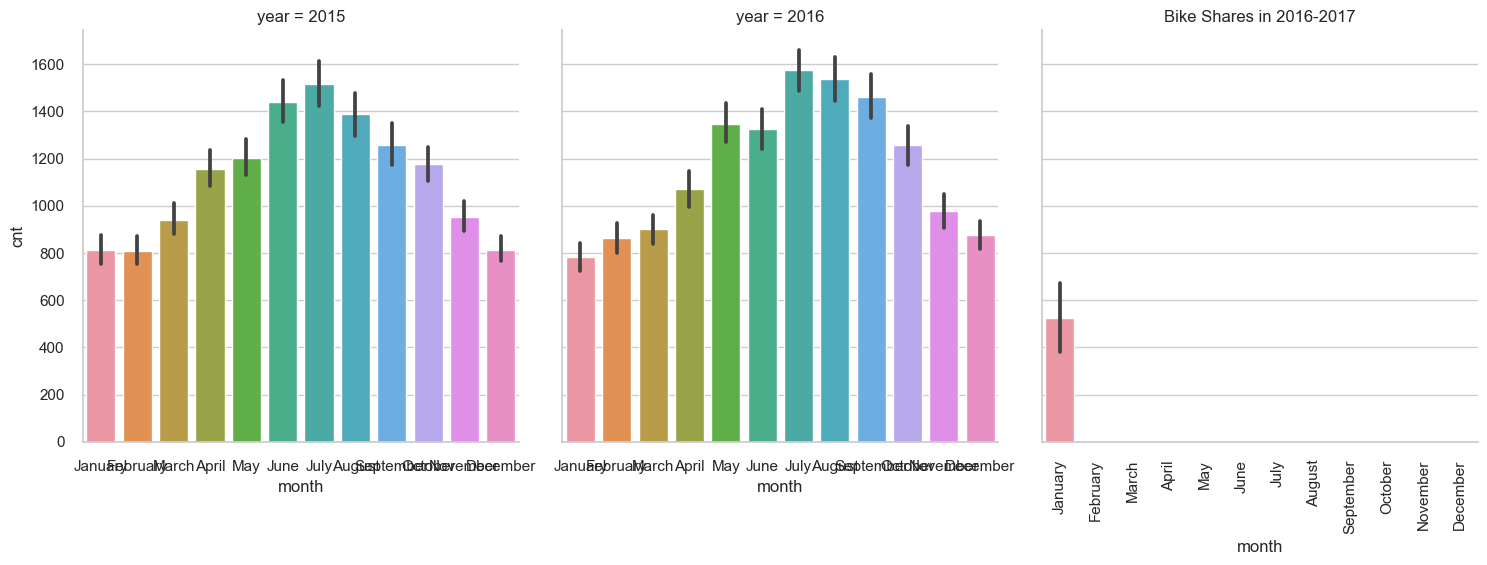

In [152]:
plt.figure(figsize=(12, 6))

sns.catplot(x= "month", y= "cnt", data= df1, col ="year", kind="bar")

plt.title('Bike Shares in 2017')

plt.xticks(rotation = 90);

Looking at the data by day of the week shows a much higher count on the number of bike shares.

In [106]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,-1.250,-1.048,0.975,-0.818,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,-1.250,-1.000,0.975,-0.909,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,-1.312,-1.000,1.150,-1.364,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,-1.375,-1.048,1.325,-1.364,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,-1.375,-1.238,0.975,-0.773,1.000,0.000,1.000,3.000


### Model Building with LSTM¶

In [107]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", verbose = 1, patience = 15)

model = Sequential()

from tensorflow.keras.optimizers import Adam, RMSprop

In [108]:
import math 
# Compute the number of rows to train the model on
train_size = int(len(df) * 0.9)# taking 90% of data to train and 10% of data to test
test_size = len(df) - train_size
train , test = df.iloc[:train_size], df.iloc[train_size:]

print(train.shape, test.shape)

(15672, 9) (1742, 9)


### RobustScaler

#### We’ll scale some of the features we’re using for our modeling:

#### We’ll also scale the number of bike shares too:

In [109]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

Robust_scale = RobustScaler()
f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

In [110]:
cnt_transformer.get_params()

{'copy': True,
 'quantile_range': (25.0, 75.0),
 'with_centering': True,
 'with_scaling': True}

#### To prepare the sequences, we’re going to reuse the same create_dataset() function:

In [111]:
def create_dataset(X, y, time_steps=1):
    Xs, ys= [], []
    for i in range(len(X)-time_steps):
        v = X.iloc[i:i+time_steps].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

#### Each sequence is going to contain 10 data points from the history:

In [112]:
TIME_STEPS = 24

X_train, y_train = create_dataset(train, train.cnt, time_steps=TIME_STEPS)
X_test , y_test = create_dataset(test, test.cnt, time_steps=TIME_STEPS)

In [113]:
#[samples, time_steps, n_features]
print(X_train.shape, y_train.shape)

(15648, 24, 9) (15648,)


In [18]:
print(X_test.shape, y_test.shape)

(1718, 24, 9) (1718,)


In [19]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(
            keras.layers.LSTM(
            units=128,
            input_shape=(X_train.shape[1], X_train.shape[2])
            )))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [21]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=10)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=20,
    validation_split=0.1,
    validation_data=(X_test,y_test),
    shuffle=False, callbacks=[early_stop]
)

Epoch 1/30
705/705 [==============================] - 13s 15ms/step - loss: 0.1983 - val_loss: 0.0697
Epoch 2/30
705/705 [==============================] - 11s 16ms/step - loss: 0.0588 - val_loss: 0.0435
Epoch 3/30
705/705 [==============================] - 13s 18ms/step - loss: 0.0407 - val_loss: 0.0336
Epoch 4/30
705/705 [==============================] - 13s 18ms/step - loss: 0.0314 - val_loss: 0.0257
Epoch 5/30
705/705 [==============================] - 13s 19ms/step - loss: 0.0253 - val_loss: 0.0277
Epoch 6/30
705/705 [==============================] - 13s 19ms/step - loss: 0.0233 - val_loss: 0.0221
Epoch 7/30
705/705 [==============================] - 13s 18ms/step - loss: 0.0207 - val_loss: 0.0232
Epoch 8/30
705/705 [==============================] - 12s 18ms/step - loss: 0.0192 - val_loss: 0.0235
Epoch 9/30
705/705 [==============================] - 12s 18ms/step - loss: 0.0181 - val_loss: 0.0207
Epoch 10/30
705/705 [==============================] - 12s 17ms/step - loss: 0.017

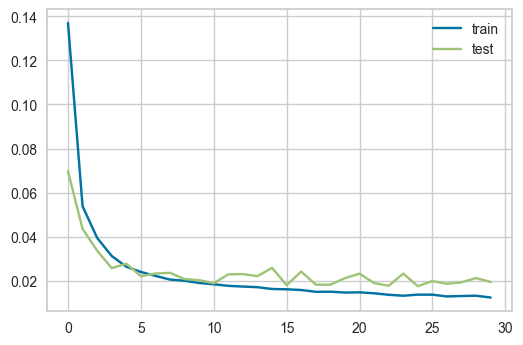

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [55]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,-1.250,-1.048,0.975,-0.818,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,-1.250,-1.000,0.975,-0.909,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,-1.312,-1.000,1.150,-1.364,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,-1.375,-1.048,1.325,-1.364,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,-1.375,-1.238,0.975,-0.773,1.000,0.000,1.000,3.000


<AxesSubplot:xlabel='t1'>

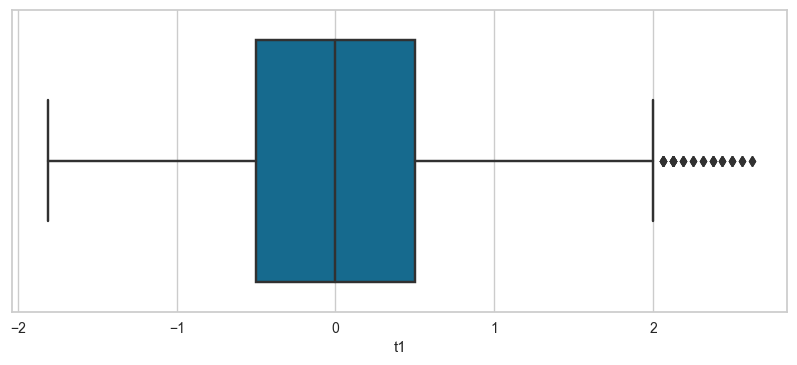

In [56]:
plt.figure(figsize=(10, 4))
sns.boxplot(train["t1"])

In [57]:
train[train["t1"]>2].shape

(45, 9)

In [58]:
train.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,-0.465,-1.250,-1.048,0.975,-0.818,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,-0.495,-1.250,-1.000,0.975,-0.909,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,-0.498,-1.312,-1.000,1.150,-1.364,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,-0.541,-1.375,-1.048,1.325,-1.364,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,-0.558,-1.375,-1.238,0.975,-0.773,1.000,0.000,1.000,3.000


In [59]:
train.t1.value_counts()

0.000     863
-0.125    740
0.125     739
0.375     709
0.250     701
         ... 
2.250       3
2.312       3
2.562       3
2.625       2
-1.812      1
Name: t1, Length: 72, dtype: int64

## 4. Demand Predictions

### Prediction Demand

#### At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values.

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

### Inverse Transform¶

In [60]:
#test_pedictions
y_pred = model.predict(X_test)

In [114]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)


ary1 = np.array(y_test_inv)
ary2 = np.array(y_pred_inv)

true_value = pd.DataFrame(data = ary1.flatten(), columns = ["True_Value"])
predicted = pd.DataFrame(data = ary2.flatten(), columns = ["Predicted"])

### Calculate Train and Test Error Scores

In [62]:
model.evaluate(X_test, y_test, verbose = 0) ## inverse olarak nasil hesaplariz

0.015373315662145615

In [64]:
y_pred.shape

(1718, 1)

In [65]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)


ary1 = np.array(y_test_inv)
ary2 = np.array(y_pred_inv)

true_value = pd.DataFrame(data = ary1.flatten(), columns = ["True_Value"])
predicted = pd.DataFrame(data = ary2.flatten(), columns = ["Predicted"])

In [66]:
result= pd.concat([true_value, predicted], axis = 1)
result.head()

,True_Value,Predicted
0,3985.000,3837.089
1,2070.000,1955.477
2,968.000,1075.144
3,965.000,1022.468
4,1180.000,1348.364


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(result["True_Value"],result["Predicted"])
rmse = np.sqrt(mean_squared_error(result.True_Value, result.Predicted))
mse = mean_squared_error(result.True_Value, result.Predicted)
r2 = r2_score(result.True_Value, result.Predicted)

print(f"r2_score:{r2}\nrmse: {rmse} [mse:{mse}]\nmae:{mae}")

r2_score:0.9625280713273174
rmse: 180.03227440269413 [mse:32411.61982660696]
mae:105.96094233165381


<Figure size 2000x1000 with 0 Axes>

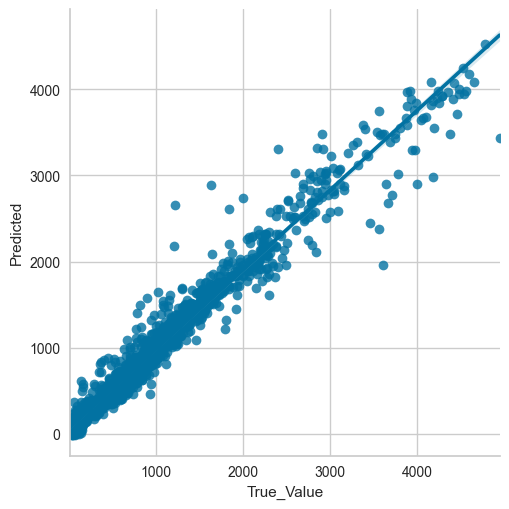

In [68]:
plt.figure(figsize=(20, 10))
sns.lmplot(x= "True_Value", y = "Predicted", data = result);

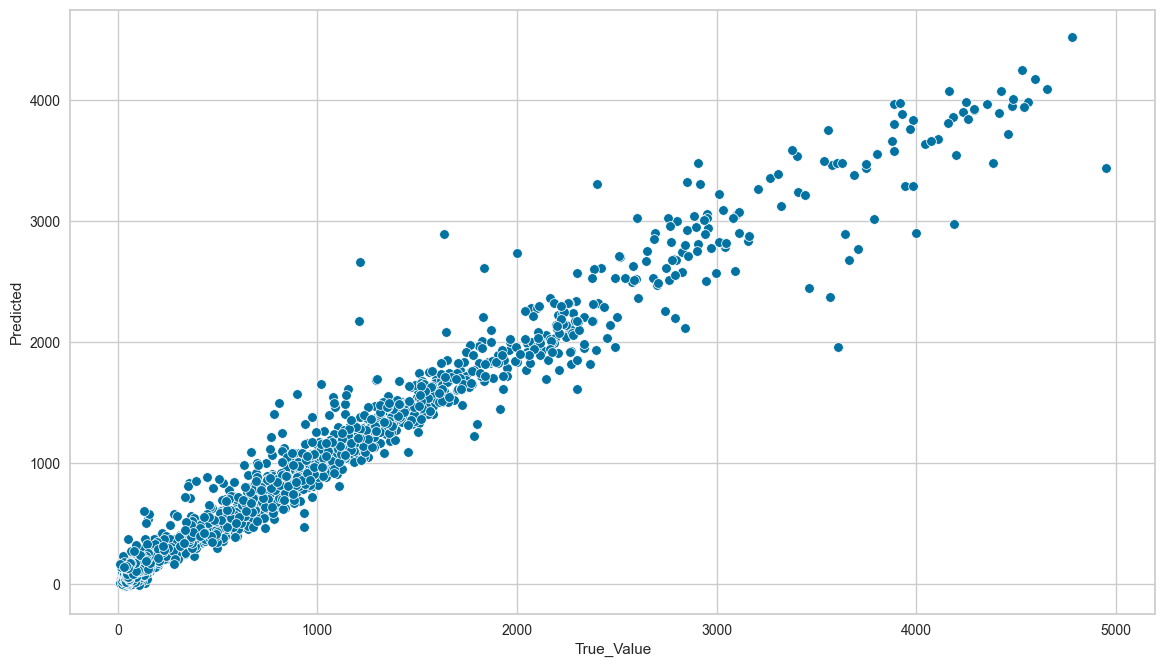

In [69]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x= "True_Value", y = "Predicted", data = result);

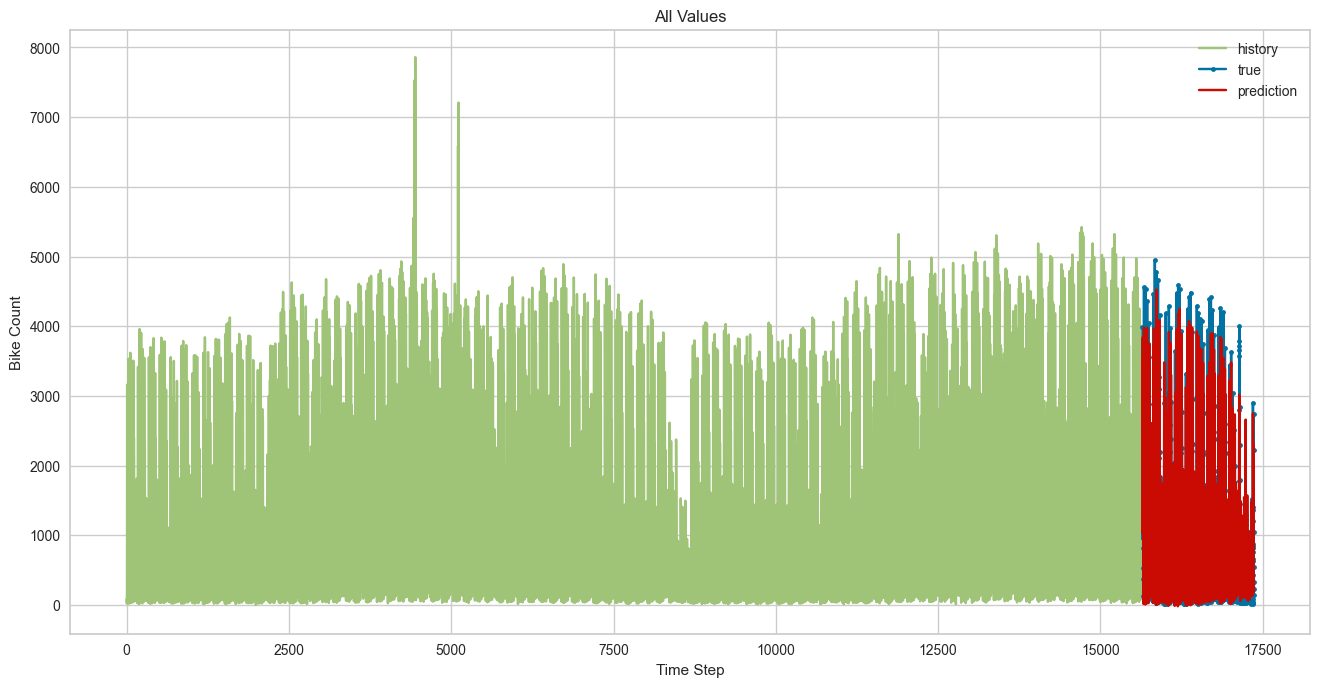

In [71]:
plt.figure(figsize=(16, 8))
plt.title('All Values')
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

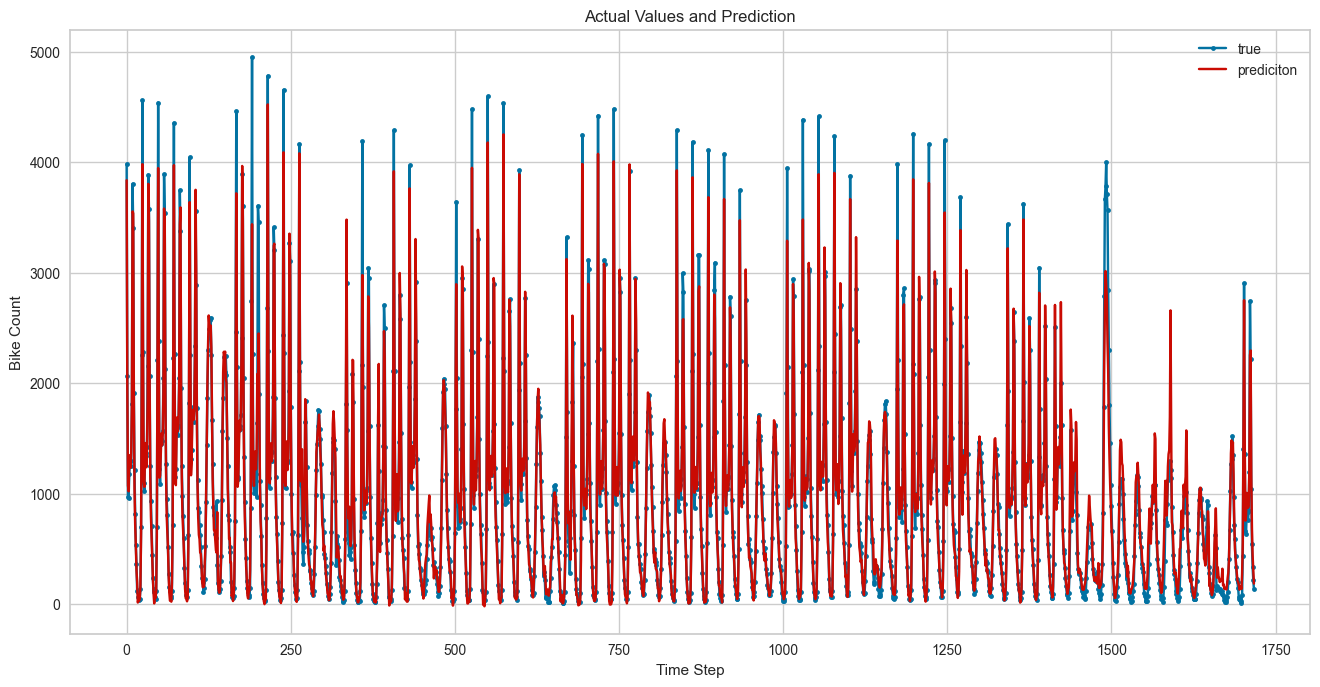

In [72]:
plt.figure(figsize=(16, 8))
plt.title('Actual Values and Prediction')
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_inv.flatten(),'r', label='prediciton')
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

#### Let’s zoom in on the predictions:

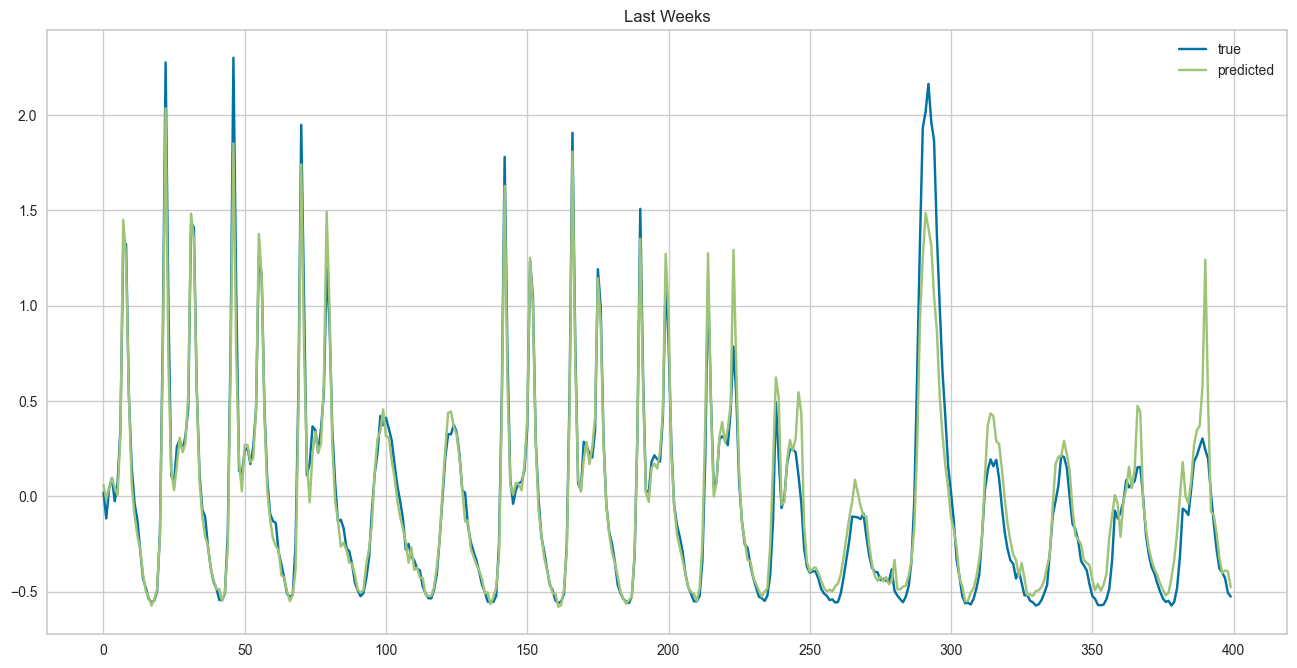

In [130]:
#Pick some values to zoom in
plt.figure(figsize=(16, 8))
plt.title('Last Weeks')
plt.plot(y_test[1200:1600], label='true')
plt.plot(y_pred[1200:1600], label='predicted')
plt.legend();

Note that our model is predicting only one point in the future. That being said, it is doing very well. Although our model can’t really capture the extreme values it does a good job of predicting (understanding) the general pattern.

In [123]:
from tensorflow.keras.models import load_model

In [124]:
model.save("my_model.h5")

In [125]:
later_model = load_model("my_model.h5")

## Conclusion

We just took a real dataset, preprocessed it, and used it to predict bike-sharing demand. Obviously, bidirectional LSTM model to train it on subsequences from the original dataset. We even got some very good results.

In [234]:
last = df.copy 

In [263]:
last = df[13978:15696]

In [264]:
last.shape

(1718, 9)

In [265]:
y_pred_inv.flatten().shape

(1718,)

In [266]:
y_test_inv.flatten().shape

(1718,)

In [267]:
last["True"] = y_test_inv.flatten()

In [268]:
last["Pred"] = y_pred_inv.flatten()

In [269]:
last.reset_index(inplace = True)

In [270]:
last

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,True,Pred
0,2016-08-12 02:00:00,106,18.000,18.000,78.000,15.000,3.000,0.000,0.000,1.000,3985.000,3837.089
1,2016-08-12 03:00:00,93,17.000,17.000,83.000,16.000,1.000,0.000,0.000,1.000,2070.000,1955.477
2,2016-08-12 04:00:00,82,16.000,16.000,85.500,16.000,1.000,0.000,0.000,1.000,968.000,1075.144
3,2016-08-12 05:00:00,135,16.000,16.000,83.000,16.000,1.000,0.000,0.000,1.000,965.000,1022.468
4,2016-08-12 06:00:00,669,16.000,16.000,83.000,15.000,1.000,0.000,0.000,1.000,1180.000,1348.364
...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2016-10-24 03:00:00,30,10.500,9.500,79.500,9.000,1.000,0.000,0.000,2.000,1042.000,1167.628
1714,2016-10-24 04:00:00,63,10.000,8.000,82.000,12.000,1.000,0.000,0.000,2.000,541.000,689.662
1715,2016-10-24 05:00:00,126,10.000,8.000,79.000,12.000,1.000,0.000,0.000,2.000,337.000,443.763
1716,2016-10-24 06:00:00,585,10.500,9.500,79.500,14.000,7.000,0.000,0.000,2.000,224.000,310.602


In [271]:
a =last.rename(columns={'timestamp': 'Date'})
a

,Date,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,True,Pred
0,2016-08-12 02:00:00,106,18.000,18.000,78.000,15.000,3.000,0.000,0.000,1.000,3985.000,3837.089
1,2016-08-12 03:00:00,93,17.000,17.000,83.000,16.000,1.000,0.000,0.000,1.000,2070.000,1955.477
2,2016-08-12 04:00:00,82,16.000,16.000,85.500,16.000,1.000,0.000,0.000,1.000,968.000,1075.144
3,2016-08-12 05:00:00,135,16.000,16.000,83.000,16.000,1.000,0.000,0.000,1.000,965.000,1022.468
4,2016-08-12 06:00:00,669,16.000,16.000,83.000,15.000,1.000,0.000,0.000,1.000,1180.000,1348.364
...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2016-10-24 03:00:00,30,10.500,9.500,79.500,9.000,1.000,0.000,0.000,2.000,1042.000,1167.628
1714,2016-10-24 04:00:00,63,10.000,8.000,82.000,12.000,1.000,0.000,0.000,2.000,541.000,689.662
1715,2016-10-24 05:00:00,126,10.000,8.000,79.000,12.000,1.000,0.000,0.000,2.000,337.000,443.763
1716,2016-10-24 06:00:00,585,10.500,9.500,79.500,14.000,7.000,0.000,0.000,2.000,224.000,310.602


In [258]:
a["Date"]

0      2016-08-12 02:00:00
1      2016-08-12 03:00:00
2      2016-08-12 04:00:00
3      2016-08-12 05:00:00
4      2016-08-12 06:00:00
               ...        
1713   2016-10-24 03:00:00
1714   2016-10-24 04:00:00
1715   2016-10-24 05:00:00
1716   2016-10-24 06:00:00
1717   2016-10-24 07:00:00
Name: Date, Length: 1718, dtype: datetime64[ns]

In [272]:
a.set_index('Date',inplace=True)


In [273]:
a

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,True,Pred
Date,,,,,,,,,,,
2016-08-12 02:00:00,106,18.000,18.000,78.000,15.000,3.000,0.000,0.000,1.000,3985.000,3837.089
2016-08-12 03:00:00,93,17.000,17.000,83.000,16.000,1.000,0.000,0.000,1.000,2070.000,1955.477
2016-08-12 04:00:00,82,16.000,16.000,85.500,16.000,1.000,0.000,0.000,1.000,968.000,1075.144
2016-08-12 05:00:00,135,16.000,16.000,83.000,16.000,1.000,0.000,0.000,1.000,965.000,1022.468
2016-08-12 06:00:00,669,16.000,16.000,83.000,15.000,1.000,0.000,0.000,1.000,1180.000,1348.364
...,...,...,...,...,...,...,...,...,...,...,...
2016-10-24 03:00:00,30,10.500,9.500,79.500,9.000,1.000,0.000,0.000,2.000,1042.000,1167.628
2016-10-24 04:00:00,63,10.000,8.000,82.000,12.000,1.000,0.000,0.000,2.000,541.000,689.662
2016-10-24 05:00:00,126,10.000,8.000,79.000,12.000,1.000,0.000,0.000,2.000,337.000,443.763


<Figure size 3000x1500 with 0 Axes>

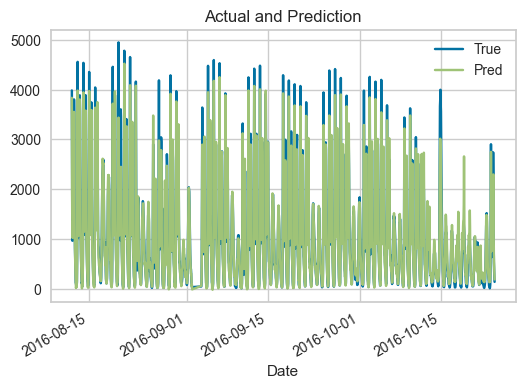

In [281]:
a.groupby(a.index)[["True","Pred"]].transform("max").plot()
plt.title('Actual and Prediction');

In [ ]:
# ######

In [ ]:
df1 = sw.compare(df[100:], df[:7043])
df1.show_html('Compare.html')

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="left",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=20000,
    max_cols_analyzed=50,
)

In [ ]:
y = df["cnt"]
X = df.drop(columns = ['cnt'])


In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
#!pip install --user lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit (X_train, X_test, y_train, y_test)
models

In [ ]:
# Create a grid of variables, put charges in the same column for easier interpretation
sns.boxplot(x = 'InternetService',
            y = 'MonthlyCharges',
            data = CustomerChurnInputData)


subplot(2,2,1)
sns.boxplot(x = 'InternetService',
            y = 'MonthlyCharges',
            data = CustomerChurnInputData)

subplot(2,2,2)
sns.boxplot(x = 'InternetService',
            y = 'TotalCharges',
            data = CustomerChurnInputData)

subplot(2,2,3)
sns.boxplot(x = 'InternetService',
            y = 'tenure',
            data = CustomerChurnInputData)

# Adjust the grid
plt.subplots_adjust(left = 1, 
                    right = 2.5,
                    top = 2)

# Display the plot
plt.show()